## HW3
### Mohammadreza Yadegari

In this homework, I use the 'Iris' dataset, which includes three iris species with 50 samples each, along with some properties of each flower. One flower species is linearly separable from the other two; however, the latter two are not linearly separable from each other. Therefore, I utilize this property and remove 'Iris-Versicolor' (the middle one) because I want to make use of the linear separability feature.


In [ ]:
import csv
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def loadDataset(filename):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        headers = dataset[0]
        dataset = dataset[1: len(dataset)]
        return dataset , headers
dataset , headers = loadDataset('Iris.csv')
print("HEADERS")
print(headers)
#print(dataset[0:2])
dataset = np.array(dataset)
#dataset = dataset.astype(float)
print("Dataset Size")
print(len(dataset), "X", len(dataset[0]))
# The 8 bottom lines remove additional columns and prepare the data set
p_tr = dataset[ :40 , 1 : -2]
p_ts = dataset[40 :50 , 1 : -2]

q_tr = dataset[50 :90 , 1 : -2]
q_ts = dataset[90 :100 , 1 : -2]

a_tr = dataset[ :40 , -1]
a_ts = dataset[40 :50 , -1]

b_tr = dataset[50 :90 , -1]
b_ts = dataset[90 :100 , -1]
#print(p_tr)
#print(p_tr.shape)
#print(q_tr)
#print(q_tr.shape)

HEADERS
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
Dataset Size
150 X 6


In [ ]:
X_train = np.vstack((p_tr,q_tr))
a_tr = a_tr.reshape(40,1)
b_tr = b_tr.reshape(40,1)
m = np.vstack((a_tr,b_tr))
Y_train = []
for i in m:
    if ( i == 'Iris-setosa'):
        Y_train.append(1)
    else:
        Y_train.append(-1)
Y_train = np.array(Y_train)
#Y_train = Y_train.reshape(80,1)
#print(Y_train)
#print(Y_train.shape)
X_train.shape
Y_train.shape
X_train = X_train.astype(float)

#print(X_train)
X_train.shape
X_train[: , 0:1] = (X_train[: , 0:1] - 4.3)/2.7
X_train[: , 1:2] = (X_train[: , 1:2] - 2)/2.4
X_train[: ,  -1] = (X_train[: , -1] - 1)/4.1
print(X_train)


[[0.2962963  0.625      0.09756098]
 [0.22222222 0.41666667 0.09756098]
 [0.14814815 0.5        0.07317073]
 [0.11111111 0.45833333 0.12195122]
 [0.25925926 0.66666667 0.09756098]
 [0.40740741 0.79166667 0.17073171]
 [0.11111111 0.58333333 0.09756098]
 [0.25925926 0.58333333 0.12195122]
 [0.03703704 0.375      0.09756098]
 [0.22222222 0.45833333 0.12195122]
 [0.40740741 0.70833333 0.12195122]
 [0.18518519 0.58333333 0.14634146]
 [0.18518519 0.41666667 0.09756098]
 [0.         0.41666667 0.02439024]
 [0.55555556 0.83333333 0.04878049]
 [0.51851852 1.         0.12195122]
 [0.40740741 0.79166667 0.07317073]
 [0.2962963  0.625      0.09756098]
 [0.51851852 0.75       0.17073171]
 [0.2962963  0.75       0.12195122]
 [0.40740741 0.58333333 0.17073171]
 [0.2962963  0.70833333 0.12195122]
 [0.11111111 0.66666667 0.        ]
 [0.2962963  0.54166667 0.17073171]
 [0.18518519 0.58333333 0.2195122 ]
 [0.25925926 0.41666667 0.14634146]
 [0.25925926 0.58333333 0.14634146]
 [0.33333333 0.625      0.12

In [ ]:
X_test = np.vstack((p_ts,q_ts))
a_ts = a_ts.reshape(10,1)
b_ts = b_ts.reshape(10,1)
m_test = np.vstack((a_ts,b_ts))
Y_test = []
for i in m_test:
    if ( i == 'Iris-setosa'):
        Y_test.append(1)
    else:
        Y_test.append(-1)
Y_test = np.array(Y_test)
#Y_train = Y_train.reshape(80,1)
#print(Y_test)
#print(Y_test.shape)
X_test.shape
Y_test.shape
X_test = X_test.astype(float)

#print(X_test)
X_test.shape
X_test[: , 0:1] = (X_test[: , 0:1] - 4.3)/2.7
X_test[: , 1:2] = (X_test[: , 1:2] - 2)/2.4
X_test[: ,  -1] = (X_test[: , -1] - 1)/4.1
print(X_test)

[[0.25925926 0.625      0.07317073]
 [0.07407407 0.125      0.07317073]
 [0.03703704 0.5        0.07317073]
 [0.25925926 0.625      0.14634146]
 [0.2962963  0.75       0.2195122 ]
 [0.18518519 0.41666667 0.09756098]
 [0.2962963  0.75       0.14634146]
 [0.11111111 0.5        0.09756098]
 [0.37037037 0.70833333 0.12195122]
 [0.25925926 0.54166667 0.09756098]
 [0.44444444 0.25       0.82926829]
 [0.66666667 0.41666667 0.87804878]
 [0.55555556 0.25       0.73170732]
 [0.25925926 0.125      0.56097561]
 [0.48148148 0.29166667 0.7804878 ]
 [0.51851852 0.41666667 0.7804878 ]
 [0.51851852 0.375      0.7804878 ]
 [0.7037037  0.375      0.80487805]
 [0.2962963  0.20833333 0.48780488]
 [0.51851852 0.33333333 0.75609756]]


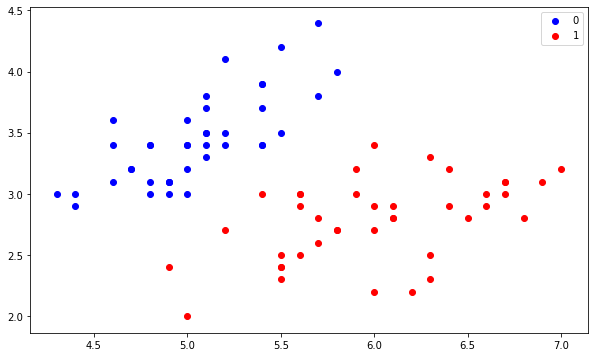

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], color='b', label='0')
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='r', label='1')
plt.legend();

### Create base functions

In [ ]:
def base_function(g,y,z,m):
    c = []
    for i in range(m):
        for j in range(m):
            for k in range(m):
                if (((i + j + k) <= m)):
                        c.append((g**i)*(y**j)*(z**k))

    c.append(g**m)
    c.append(y**m)
    c.append(z**m)
    return(c)

### Create design matrix

In [ ]:
def design_matrix(v,m):
    f = []
    for i in range(len(v)):
        f.append(base_function(v[i][0],v[i][1],v[i][2],m))
        #print(f)
    return(f)

### In this cell create Target matrix of train set for The Ieast square classification

In [ ]:
q = len(Y_train)
p = 2
F = []
for i in range(q):
    F.append([0] * p)
c = 0
for i in Y_train:
    if (i == 1):
        F[c][0] = i
        c += 1
    if (i == -1):
        F[c][1] = i
        c += 1
T_train = np.array(F)
#print(T_train)
T_train.shape

(80, 2)

### In this cell create Target matrix of test set for The Ieast square classification

In [ ]:
q = len(Y_test)
p = 2
F = []
for i in range(q):
    F.append([0] * p)
c = 0
for i in Y_test:
    if (i == 1):
        F[c][0] = i
        c += 1
    if (i == -1):
        F[c][1] = i
        c += 1
T_test = np.array(F)
#print(T_test)
T_test.shape

(20, 2)

In [ ]:
def Criterion(Y_test,T_test):
    TP = 0
    FN = 0
    FP = 0
    Y_test = np.round(Y_test)
    for i in range(len(Y_test)):
        if ((Y_test[i][0] == 1) and (T_test[i][0] == 1)):
            TP += 1
        if ((Y_test[i][0] == 0) and (T_test[i][0] == 1)):
            FN += 1
        if ((Y_test[i][0] == 1) and (T_test[i][0] == 0)):
            FP += 1
    Recall = TP / (TP + FN)
    Precision = TP / (TP + FP)
    f1_score = (2 * Recall * Precision) / (Recall + Precision)
    #print(f'Recall on test data is: {Recall}')
    #print(f'Precision on test data is: {Precision}')
    #print(f'F1_score on test data is: {F1_score}')
    return f1_score

###Least square classification

In [ ]:
degree = 10
F1_score = []
for i in range(1,degree+1):
    Fai_train = np.array(design_matrix(X_train,i))
    W = np.linalg.pinv(Fai_train, rcond=1e-15) @ T_train
    Fai_test = np.array(design_matrix(X_test,i))
    y_test = Fai_test @ W
    F1_score.append(Criterion(y_test,T_test))

### Table of F1_score for The Ieast square classification

In [ ]:
H = []
for i in range(1,degree+1):
    H.append(i)
df = pd.DataFrame()
df['Degree'] = H
df['F1_score of LSC'] = F1_score
df


,Degree,F1_score of LSC
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0


### In the four bottom cells, I create functions for Fisher's Linear Discriminant Method

In [ ]:
def base_function_F(g,y,z,m):
    c = []
    for i in range(1,m):
        for j in range(1,m):
            for k in range(1,m):
                if (((i + j + k) <= m)):
                        c.append((g**i)*(y**j)*(z**k))

    c.append(g**m)
    c.append(y**m)
    c.append(z**m)
    return(c)


In [ ]:
def design_matrix_F(v,m):
    f = []
    for i in range(len(v)):
        f.append(base_function_F(v[i][0],v[i][1],v[i][2],m))
        #print(f)
    return(f)

In [ ]:
def Criterion_F(y,t):
    TP = 0
    FN = 0
    FP = 0
    for i in range(len(y)):
        if ((y[i] == 1) and (t[i] == 1)):
            TP += 1
        if ((y[i] == -1) and (t[i] == 1)):
            FN += 1
        if ((y[i] == 1) and (t[i] == -1)):
            FP += 1
    Recall = TP / (TP + FN)
    Precision = TP / (TP + FP)
    f1_score = (2 * Recall * Precision) / (Recall + Precision)
    #print(f'Recall on test data is: {Recall}')
    #print(f'Precision on test data is: {Precision}')
    #print(f'F1_score on test data is: {F1_score}')
    return f1_score

## Fisher's Linear discrimination method


In [ ]:
degree = 5 # at first i get larger degree but at degree 6 and larger degree than 6, the LSTSQ can not solve equation and print "LinAlgError: SVD did not converge in Linear Least Squares"
F1_score_F = []
for i in range(1,degree + 1):
    Fai_train_F = np.array(design_matrix_F(X_train,i))
    Fai_test_F = np.array(design_matrix_F(X_test,i))
    Fai_train_F_1 = Fai_train_F[:40 , :]
    Fai_train_F_2 = Fai_train_F[40:80 , :]
    M1 = np.mean(Fai_train_F_1, axis = 0)
    M2 = np.mean(Fai_train_F_2, axis = 0)
    Sw = []
    B = np.empty((len(Fai_train_F[0]),len(Fai_train_F[0])))
    for k in range(len(Fai_train_F_1)):
        B += (((Fai_train_F_1[k].reshape(len(Fai_train_F[0]),1) - M1.reshape(len(Fai_train_F[0]),1)) * (Fai_train_F_1[k].reshape(len(Fai_train_F[0]),1) - M1.reshape(len(Fai_train_F[0]),1)).T) + ((Fai_train_F_2[k].reshape(len(Fai_train_F[0]),1) - M2.reshape(len(Fai_train_F[0]),1)) * (Fai_train_F_2[k].reshape(len(Fai_train_F[0]),1) - M2.reshape(len(Fai_train_F[0]),1)).T))
    Sw = np.array(B)
    WF = np.linalg.lstsq(Sw, (M1 - M2), rcond=None)[0]
    #print(WF)
    WF = np.array(WF)
    #print(WF.shape)

    W0 = (-(1/2)) * WF.T @ (M1 + M2)
    #print(W0)
    y_p = Fai_test_F @  (50 * WF) + W0
    #print(y_p.reshape(20,1))
    Y_F_R = []
    for j in y_p:
        if j >= 0:
            Y_F_R.append(1)
        if j < 0:
            Y_F_R.append(-1)
    #print(Y_F_R)
    F1_score_F.append(Criterion_F(Y_F_R,Y_test))
H_F = []
for i in range(1,degree + 1):
    H_F.append(i)
df = pd.DataFrame()
df['Degree'] = H_F
df['F1_score of FLD'] = F1_score_F
df

,Degree,F1_score of FLD
0,1,0.947368
1,2,1.000000
2,3,1.000000
3,4,0.461538
4,5,0.666667


# Linear Perceptron

In [ ]:
def linearperceptron(x_train, y_train, x_test, epoch, degree_p):
    Fai_train_p = np.array(design_matrix(x_train,degree_p))
    Fai_test_p = np.array(design_matrix(x_test,degree_p))
    W = np.zeros((1,len(Fai_train_p[0])))
    for e in range(epoch):
        error = 0
        for z in range(len(Fai_train_p)):
            if ((W @ Fai_train_p[z]) * y_train[z]) <= 0:
                W = W + Fai_train_p[z] * y_train[z]
                error += 1
        W = W / np.linalg.norm(W)
        if error == 0:
            print('Converged')
            break
    return W


### Compute and show F1_score with respect to degree by a table for linear perceptron

In [ ]:
F1_score_p = []
degree_p = 10
for ep in range(2,degree_p +1):
    W_p = linearperceptron(X_train, Y_train, X_test, 10000, ep)
    W_p.shape
    Fai_test_p = np.array(design_matrix(X_test,ep))
    y_p = Fai_test_p @ W_p.T
    Y_p_test = []
    for i in y_p:
        #print(i)
        if (i > 0):
            Y_p_test.append(1)
        if (i < 0):
            Y_p_test.append(-1)
    #print(Y_p_test)
    F1_score_p.append(Criterion_F(Y_p_test,Y_test))
H_p = []
for i in range(2,degree_p + 1):
    H_p.append(i)
df = pd.DataFrame()
df['Degree'] = H_p
df['F1_score of LP'] = F1_score_p
df

Converged
Converged
Converged
Converged
Converged
Converged
Converged


,Degree,F1_score of LP
0,2,0.181818
1,3,0.947368
2,4,0.947368
3,5,0.947368
4,6,0.947368
5,7,0.947368
6,8,0.947368
7,9,0.947368
8,10,0.947368


### In these two cells, prepare the data and labeled targets for Logistic Regression

In [ ]:
X_train_R = np.vstack((p_tr,q_tr))
a_tr = a_tr.reshape(40,1)
b_tr = b_tr.reshape(40,1)
m = np.vstack((a_tr,b_tr))
Y_train_R = []
for i in m:
    if ( i == 'Iris-setosa'):
        Y_train_R.append(1)
    else:
        Y_train_R.append(0)
Y_train_R = np.array(Y_train_R)
#Y_train = Y_train.reshape(80,1)
#print(Y_train_R)
#print(Y_train_R.shape)
X_train_R = X_train_R.astype(float)

#print(X_train_R)
X_train_R.shape
X_train_R[: , 0:1] = (X_train_R[: , 0:1] - 4.3)/2.7
X_train_R[: , 1:2] = (X_train_R[: , 1:2] - 2)/2.4
X_train_R[: ,  -1] = (X_train_R[: , -1] - 1)/4.1
#print(X_train_R)


In [ ]:
X_test_R = np.vstack((p_ts,q_ts))
a_ts = a_ts.reshape(10,1)
b_ts = b_ts.reshape(10,1)
m_test = np.vstack((a_ts,b_ts))
Y_test_R = []
for i in m_test:
    if ( i == 'Iris-setosa'):
        Y_test_R.append(1)
    else:
        Y_test_R.append(0)
Y_test_R = np.array(Y_test_R)
#Y_train = Y_train.reshape(80,1)
#print(Y_test_R)
#print(Y_test_R.shape)
X_test_R.shape
Y_test_R.shape
X_test_R = X_test_R.astype(float)

#print(X_test_R)
X_test_R.shape
X_test_R[: , 0:1] = (X_test_R[: , 0:1] - 4.3)/2.7
X_test_R[: , 1:2] = (X_test_R[: , 1:2] - 2)/2.4
X_test_R[: ,  -1] = (X_test_R[: , -1] - 1)/4.1
#print(X_test_R)

# Logistic Regression

In [ ]:
def LogesticRegression(X, Y, epoch, lr, degree_R, convergence_delta):
    Fai_train_R = np.array(design_matrix(X_train_R,degree_R))
    W = np.zeros((len(Fai_train_R[0]),1))
    N = len(Y)
    def cost(y,t):
        return  -(t.T @ np.log(y) + (1-t).T @ np.log(1-y)).mean()
    costs = [-1]
    #costs.append(cost(LR,Y))
    for i in range(epoch):
        Z = Fai_train_R @ W
        LR = 1 / (1 + np.exp(-Z))
        GR = (1 / N) * Fai_train_R.T @ (np.subtract(LR,Y.reshape(80,1)))
        W = W - (lr * GR)
        costs.append(cost(LR,Y))
        if costs[-1] > costs[-2]:
            lr = lr / 2

        if np.linalg.norm(GR) < convergence_delta:
            print('Converged')
            break


    plt.plot(costs[3:])
    plt.show()
    return W

### Compute F1_score and plot cost function for 1 to 10 degree

Plot of cost with degree 1:
Converged


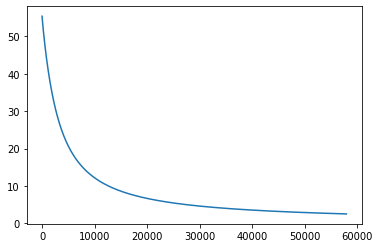

Plot of cost with degree 2:
Converged


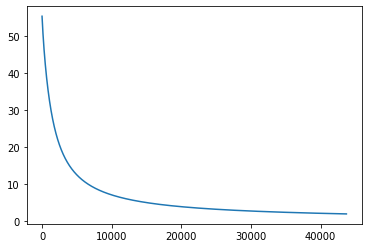

Plot of cost with degree 3:
Converged


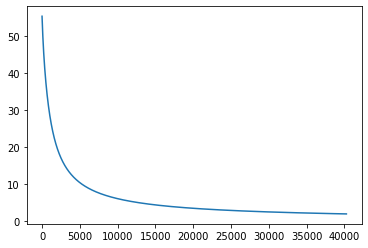

Plot of cost with degree 4:
Converged


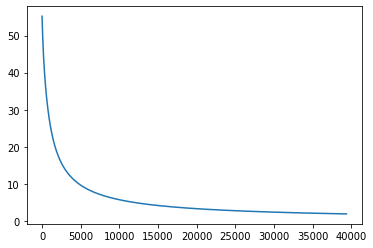

Plot of cost with degree 5:
Converged


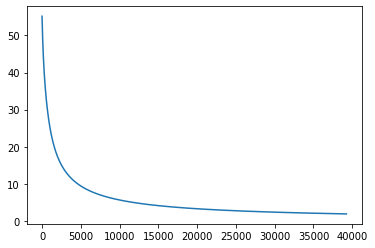

Plot of cost with degree 6:
Converged


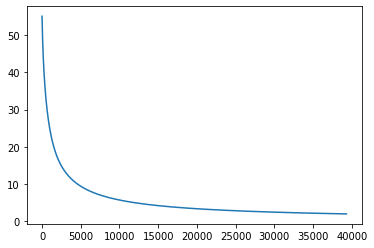

Plot of cost with degree 7:
Converged


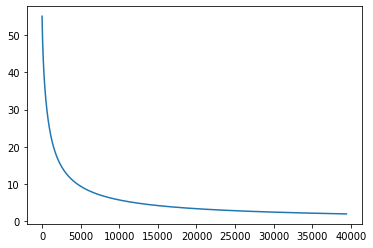

Plot of cost with degree 8:
Converged


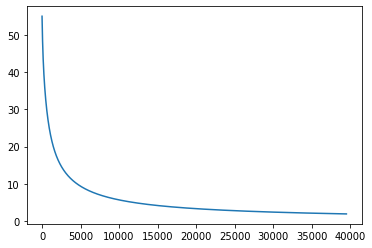

Plot of cost with degree 9:
Converged


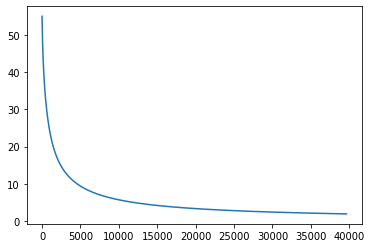

Plot of cost with degree 10:
Converged


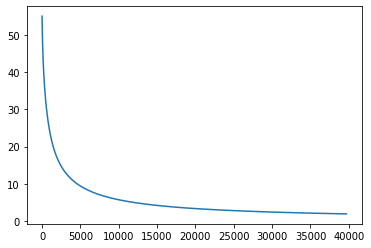

In [ ]:
F1_score_R = []
degree_R = 10
for ep in range(1,degree_R +1):
    print('Plot of cost with degree ' + str(ep) + ':')
    W_R = LogesticRegression(X_train_R, Y_train_R, 100000, 0.01, ep, convergence_delta=0.01)
    Fai_test_R = np.array(design_matrix(X_test_R,ep))
    Y_PRR = Fai_test_R @ W_R
    Y_PRR_test = []
    for i in Y_PRR:
        #print(i)
        if (i > 0.5):
            Y_PRR_test.append(1)
        if (i < 0.5):
            Y_PRR_test.append(0)
    #print(Y_p_test)
    F1_score_R.append(Criterion_F(Y_PRR_test,Y_test_R))


### create Table to show F1_score with respect to degree

In [ ]:
H_R = []
for i in range(1,degree_R + 1):
    H_R.append(i)
df = pd.DataFrame()
df['Degree'] = H_R
df['F1_score of LR'] = F1_score_R
df

,Degree,F1_score of LR
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0
